# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [8]:
import pandas as pd
tabela = pd.read_csv('advertising.csv')
display(tabela)
print (tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

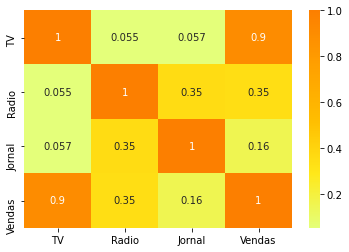

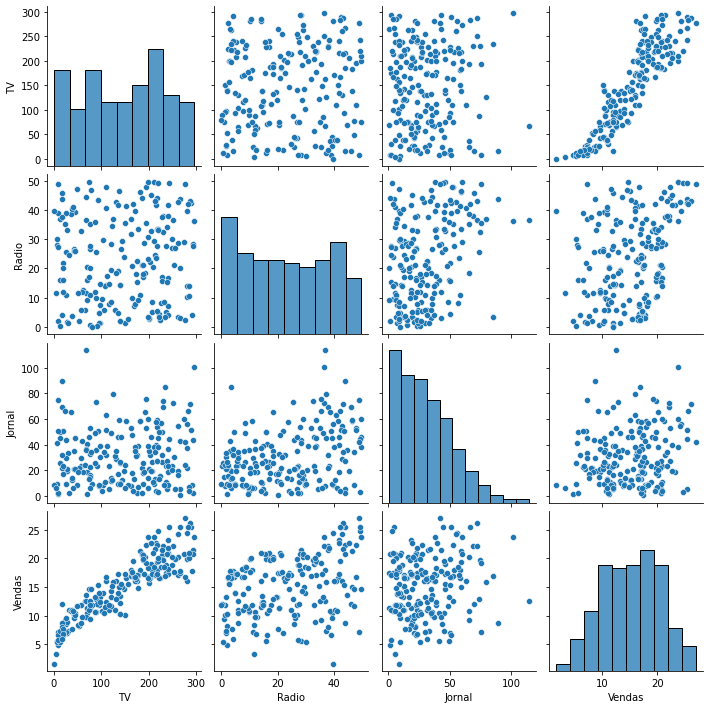

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(tabela.corr(),annot = True,cmap = 'Wistia')
plt.show()

sns.pairplot(tabela)
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [10]:
from sklearn.model_selection import train_test_split
y = tabela["Vendas"]
x = tabela.drop("Vendas", axis = 1)

x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size = 0.3,random_state = 1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)
RandomForestRegressor()

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [15]:
from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste,previsao_regressaolinear))
print(metrics.r2_score(y_teste,previsao_arvoredecisao))

0.9071151423684273
0.9636085268331163


#### Visualização Gráfica das Previsões

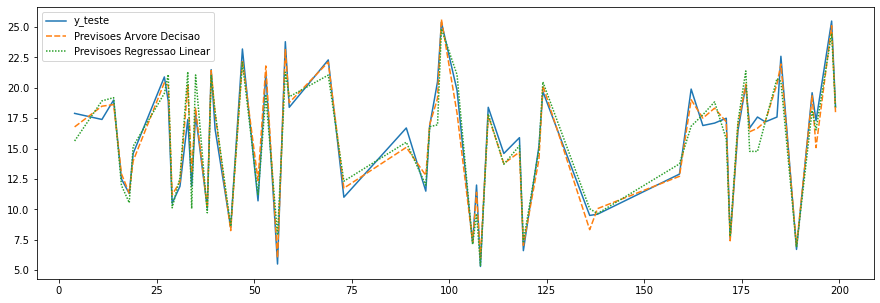

In [21]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar['Previsoes Arvore Decisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsoes Regressao Linear'] = previsao_regressaolinear
plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

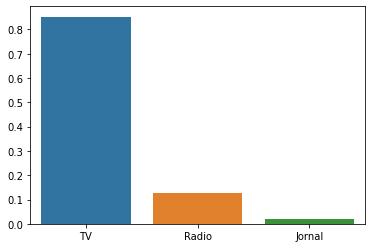

In [22]:
sns.barplot(x = x_treino.columns,y = modelo_arvoredecisao.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [ ]:
Sim, a melhor decisão é investir em anuncios de TV.